In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/diana/Documents/Repos/GitHub/project-fifa-moneyball/Fifa 23 Players Data.csv")


In [3]:
df = pd.DataFrame(df)

# df.set_option('display.max_columns', None)
df.head(2)

Known As      Full Name  Overall  Potential  Value(in Euro)  \
0    L. Messi   Lionel Messi       91         91        54000000   
1  K. Benzema  Karim Benzema       91         91        64000000   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   

                                         Image Link  Age  ...  LM Rating  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35  ...         91   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34  ...         89   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
0         88         91          67         66          67         62   
1         84         89          67         67          67         63   

  CB Rating RB Rating GK Rating  
0        53        62        22  
1        58        63        21  

[2 rows x 89 columns]

In [4]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

119

In [5]:
df = df.drop_duplicates()

In [6]:
# Transform columns into millions of euros.

df['Wage(in Euro)'] = df['Wage(in Euro)'] / 1e6
df['Value(in Euro)'] = df['Value(in Euro)'] / 1e6
df['Release Clause'] = df['Release Clause']/  1e6

In [7]:
df.head(2)

Known As      Full Name  Overall  Potential  Value(in Euro)  \
0    L. Messi   Lionel Messi       91         91            54.0   
1  K. Benzema  Karim Benzema       91         91            64.0   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   

                                         Image Link  Age  ...  LM Rating  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35  ...         91   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34  ...         89   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
0         88         91          67         66          67         62   
1         84         89          67         67          67         63   

  CB Rating RB Rating GK Rating  
0        53        62        22  
1        58        63        21  

[2 rows x 89 columns]

In [8]:
df.describe()

Overall     Potential  Value(in Euro)           Age  \
count  18420.000000  18420.000000    18420.000000  18420.000000   
mean      65.792942     70.963301        2.842697     25.243920   
std        6.770177      6.170634        7.645260      4.725456   
min       47.000000     48.000000        0.000000     16.000000   
25%       62.000000     67.000000        0.475000     21.000000   
50%       66.000000     71.000000        0.975000     25.000000   
75%       70.000000     75.000000        2.000000     29.000000   
max       91.000000     95.000000      190.500000     44.000000   

       Height(in cm)  Weight(in kg)   TotalStats     BaseStats  Wage(in Euro)  \
count   18420.000000   18420.000000  18420.00000  18420.000000   18420.000000   
mean      181.550814      75.170141   1600.67139    357.650543       0.008733   
std         6.855181       7.006937    272.81089     39.541870       0.019452   
min       155.000000      49.000000    759.00000    224.000000       0.000000   
25%       177.000000      70.000000   1469.00000    331.000000       0.001000   
50%       182.000000      75.000000   1639.00000    358.000000       0.003000   
75%       186.000000      80.000000   1784.00000    385.000000       0.007000   
max       206.000000     105.000000   2312.00000    502.000000       0.450000   

       Release Clause  ...     LM Rating     CM Rating     RM Rating  \
count    18420.000000  ...  18420.000000  18420.000000  18420.000000   
mean         5.015212  ...     58.390011     57.309989     58.390011   
std         14.686055  ...     13.972513     13.156296     13.972513   
min          0.000000  ...     18.000000     18.000000     18.000000   
25%          0.660000  ...     54.000000     53.000000     54.000000   
50%          1.500000  ...     62.000000     60.000000     62.000000   
75%          3.300000  ...     67.000000     66.000000     67.000000   
max        366.700000  ...     92.000000     91.000000     92.000000   

         LWB Rating    CDM Rating    RWB Rating     LB Rating     CB Rating  \
count  18420.000000  18420.000000  18420.000000  18420.000000  18420.000000   
mean      56.219110     55.864875     56.219110     55.588111     54.468621   
std       13.887301     13.854782     13.887301     14.141491     14.725755   
min       17.000000     19.000000     17.000000     17.000000     18.000000   
25%       51.000000     48.000000     51.000000     49.000000     44.000000   
50%       59.000000     59.000000     59.000000     59.000000     58.000000   
75%       65.000000     66.000000     65.000000     65.000000     66.000000   
max       88.000000     89.000000     88.000000     87.000000     90.000000   

          RB Rating     GK Rating  
count  18420.000000  18420.000000  
mean      55.588111     23.259175  
std       14.141491     15.114423  
min       17.000000     10.000000  
25%       49.000000     17.000000  
50%       59.000000     18.000000  
75%       65.000000     20.000000  
max       87.000000     90.000000  

[8 rows x 71 columns]

In [9]:
distinct = df['Best Position'].unique()
distinct

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [10]:
position_by_category = {
    'CAM': 'Midfielders',
    'CF': 'Forwards',
    'ST': 'Forwards',
    'CM': 'Midfielders',
    'RW': 'Forwards',
    'GK': 'Goalkeepers',
    'CB': 'Defenders',
    'LW': 'Forwards',
    'CDM': 'Midfielders',
    'LM': 'Midfielders',
    'LB': 'Defenders',
    'RM': 'Midfielders',
    'RB': 'Defenders',
    'LWB': 'Defenders',
    'RWB': 'Defenders'
}

In [11]:
#Using the directory position_by_category to map Best position in 4 categories. (Midfielders,Forwards, Defenders,Goalkeepers)

df["Category"] = df["Best Position"].map(position_by_category)

In [12]:
df.head(2)

Known As      Full Name  Overall  Potential  Value(in Euro)  \
0    L. Messi   Lionel Messi       91         91            54.0   
1  K. Benzema  Karim Benzema       91         91            64.0   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   

                                         Image Link  Age  ...  CM Rating  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35  ...         88   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34  ...         84   

   RM Rating  LWB Rating  CDM Rating RWB Rating  LB Rating  CB Rating  \
0         91          67          66         67         62         53   
1         89          67          67         67         63         58   

  RB Rating GK Rating     Category  
0        62        22  Midfielders  
1        63        21     Forwards  

[2 rows x 90 columns]

In [13]:
#Selecting columns to keep and putting into a new df.


columns_to_keep = ['Known As' , 'Value(in Euro)' , 'Wage(in Euro)',  'Release Clause' , 'Category' , 'Overall', 'Potential', 'Age' , 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Attacking Work Rate' ,'Defensive Work Rate' ,  'National Team Name' , 'Club Name' ]

new_df = df[columns_to_keep]
new_df.head(2)


Known As  Value(in Euro)  Wage(in Euro)  Release Clause     Category  \
0    L. Messi            54.0          0.195       99.900000  Midfielders   
1  K. Benzema            64.0          0.450      131.199999     Forwards   

   Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
0       91         91   35          81              89             90   
1       91         91   34          80              88             83   

   Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
0               94               34                 Low                 Low   
1               87               39              Medium              Medium   

  National Team Name            Club Name  
0          Argentina  Paris Saint-Germain  
1             France       Real Madrid CF

In [14]:
# From the new_df selecting the AC Milan, our team.

club_name = 'AC Milan'
ac_milan_df = new_df[new_df['Club Name'] == 'AC Milan']
ac_milan_df.head(5)

Known As  Value(in Euro)  Wage(in Euro)  Release Clause     Category  \
37     M. Maignan            80.0          0.090           142.0  Goalkeepers   
86   T. Hernández            76.0          0.082           134.9    Defenders   
128   Rafael Leão            66.5          0.090           126.4     Forwards   
131     S. Tonali            62.5          0.075           118.8  Midfielders   
145     F. Tomori            60.5          0.075           115.0    Defenders   

     Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
37        87         90   26          85              82             85   
86        85         90   24          93              72             76   
128       84         90   23          91              77             73   
131       84         90   22          81              73             81   
145       84         90   24          86              40             60   

     Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
37                89               51              Medium              Medium   
86                81               78                High              Medium   
128               86               27              Medium                 Low   
131               79               79              Medium                High   
145               66               86              Medium                High   

    National Team Name Club Name  
37              France  AC Milan  
86              France  AC Milan  
128           Portugal  AC Milan  
131                  -  AC Milan  
145                  -  AC Milan

In [15]:
#checking the AC Milan median salary by positions.

ac_median_salary = ac_milan_df.groupby('Category')['Wage(in Euro)'].median().reset_index()
ac_median_salary

Category  Wage(in Euro)
0    Defenders          0.060
1     Forwards          0.064
2  Goalkeepers          0.025
3  Midfielders          0.058

In [16]:
# Meging the ac_median_salary df with ac_milan_df, adding the column Wage(in Euro)_median_salary. 

ac_milan_df = ac_milan_df.merge(ac_median_salary, on='Category', suffixes=('', '_median_salary'))
ac_milan_df.head(2)

Known As  Value(in Euro)  Wage(in Euro)  Release Clause     Category  \
0     M. Maignan          80.000          0.090           142.0  Goalkeepers   
1  C. Tătărușanu           0.825          0.025             1.4  Goalkeepers   

   Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
0       87         90   26          85              82             85   
1       76         76   36          74              74             73   

   Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
0               89               51              Medium              Medium   
1               77               45              Medium              Medium   

  National Team Name Club Name  Wage(in Euro)_median_salary  
0             France  AC Milan                        0.025  
1                  -  AC Milan                        0.025

In [17]:
ac_median_overall = ac_milan_df.groupby('Category')['Overall'].median().reset_index()
# ac_median_potential = ac_milan_df.groupby('Category')['Potential'].median().reset_index()
# ac_median_shooting_total = ac_milan_df.groupby('Category')['Shooting Total'].median().reset_index()
# ac_median_passing_total = ac_milan_df.groupby('Category')['Passing Total'].median().reset_index()
# ac_median_dribbling_total = ac_milan_df.groupby('Category')['Dribbling Total'].median().reset_index()
# ac_median_defending_total = ac_milan_df.groupby('Category')['Defending Total'].median().reset_index()
# ac_median_pace_total = ac_milan_df.groupby('Category')['Pace Total'].median().reset_index()

In [18]:
# Meging the ac_median_overall df with ac_milan_df, adding the column ac_median_overall

ac_milan_df = ac_milan_df.merge(ac_median_overall, on='Category', suffixes=('', '_median'))
ac_milan_df.head(5)

Known As  Value(in Euro)  Wage(in Euro)  Release Clause     Category  \
0     M. Maignan          80.000          0.090         142.000  Goalkeepers   
1  C. Tătărușanu           0.825          0.025           1.400  Goalkeepers   
2     A. Mirante           0.475          0.022           0.808  Goalkeepers   
3   T. Hernández          76.000          0.082         134.900    Defenders   
4      F. Tomori          60.500          0.075         115.000    Defenders   

   Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
0       87         90   26          85              82             85   
1       76         76   36          74              74             73   
2       74         74   38          71              73             65   
3       85         90   24          93              72             76   
4       84         90   24          86              40             60   

   Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
0               89               51              Medium              Medium   
1               77               45              Medium              Medium   
2               74               44              Medium              Medium   
3               81               78                High              Medium   
4               66               86              Medium                High   

  National Team Name Club Name  Wage(in Euro)_median_salary  Overall_median  
0             France  AC Milan                        0.025            76.0  
1                  -  AC Milan                        0.025            76.0  
2                  -  AC Milan                        0.025            76.0  
3             France  AC Milan                        0.060            78.0  
4                  -  AC Milan                        0.060            78.0

In [19]:
ac_milan_df.describe()

Value(in Euro)  Wage(in Euro)  Release Clause    Overall  Potential  \
count       31.000000      31.000000       31.000000  31.000000  31.000000   
mean        22.304839       0.054677       36.813161  77.387097  82.387097   
std         23.426984       0.025911       44.628197   5.777412   4.984492   
min          0.000000       0.005000        0.000000  60.000000  74.000000   
25%          5.400000       0.034500        3.350000  75.000000  78.500000   
50%         13.000000       0.060000       21.300000  78.000000  82.000000   
75%         29.000000       0.072000       47.850000  82.000000  85.500000   
max         80.000000       0.110000      142.000000  87.000000  90.000000   

             Age  Pace Total  Shooting Total  Passing Total  Dribbling Total  \
count  31.000000   31.000000       31.000000      31.000000        31.000000   
mean   25.741935   73.870968       65.419355      69.806452        74.354839   
std     5.773316   12.021486       14.366104       9.829952         9.928237   
min    18.000000   42.000000       33.000000      39.000000        39.000000   
25%    22.000000   66.500000       55.500000      66.000000        71.000000   
50%    24.000000   76.000000       70.000000      73.000000        77.000000   
75%    28.000000   82.500000       75.500000      76.000000        81.000000   
max    40.000000   93.000000       85.000000      85.000000        89.000000   

       Defending Total  Wage(in Euro)_median_salary  Overall_median  
count        31.000000                    31.000000       31.000000  
mean         60.677419                     0.057065       78.064516  
std          18.070947                     0.010912        0.813858  
min          27.000000                     0.025000       76.000000  
25%          46.500000                     0.058000       78.000000  
50%          66.000000                     0.060000       78.000000  
75%          74.500000                     0.062000       78.500000  
max          86.000000                     0.064000       79.000000

In [20]:
#list of players below_median_overall_and_above_median_salary - AC Milan data set

players_below_median_overall_and_above_median_salary = ac_milan_df[
    (ac_milan_df['Overall'] < ac_milan_df['Overall_median']) & 
    (ac_milan_df['Wage(in Euro)'] > ac_milan_df['Wage(in Euro)_median_salary'])
]

players_below_median_overall_and_above_median_salary

Known As  Value(in Euro)  Wage(in Euro)  Release Clause  \
9      T. Bakayoko             6.0          0.071             0.0   
18  Junior Messias            11.5          0.065            19.6   
27         S. Dest            22.5          0.071             0.0   

       Category  Overall  Potential  Age  Pace Total  Shooting Total  \
9     Defenders       75         76   27          61              48   
18     Forwards       78         78   31          84              73   
27  Midfielders       77         85   21          86              59   

    Passing Total  Dribbling Total  Defending Total Attacking Work Rate  \
9              65               71               75              Medium   
18             73               81               49                High   
27             74               81               69                High   

   Defensive Work Rate National Team Name Club Name  \
9               Medium                  -  AC Milan   
18              Medium                  -  AC Milan   
27                 Low      United States  AC Milan   

    Wage(in Euro)_median_salary  Overall_median  
9                         0.060            78.0  
18                        0.064            79.0  
27                        0.058            78.0

In [21]:
# #list of players_above_median_overall_and_below_median_salary - AC Milan data set

players_above_median_overall_and_below_median_salary = ac_milan_df[
    (ac_milan_df['Overall'] > ac_milan_df['Overall_median']) & 
    (ac_milan_df['Wage(in Euro)'] < ac_milan_df['Wage(in Euro)_median_salary'])
]

players_above_median_overall_and_below_median_salary

Known As  Value(in Euro)  Wage(in Euro)  Release Clause  Category  \
15  Z. Ibrahimović             0.0          0.063             0.0  Forwards   

    Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
15       82         82   40          58              85             76   

    Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
15               77               34              Medium                 Low   

   National Team Name Club Name  Wage(in Euro)_median_salary  Overall_median  
15             Sweden  AC Milan                        0.064            79.0

In [22]:
all_df_salary_median_by_position = new_df.groupby('Category')['Wage(in Euro)'].median().reset_index()
all_df_median_overall = new_df.groupby('Category')['Overall'].median().reset_index()
all_df_median_potential = new_df.groupby('Category')['Potential'].median().reset_index()




In [23]:
new_df = new_df.merge(all_df_salary_median_by_position, on='Category', suffixes=('', '_median_salary'))
new_df = new_df.merge(all_df_median_overall, on='Category', suffixes=('', '_median'))
new_df = new_df.merge(all_df_median_potential, on='Category', suffixes=('', '_median'))


In [24]:
all_players_below_median_overall_and_above_median_salary_and_above_10_percent_median_overall = new_df[
    (new_df['Overall'] > new_df['Overall_median']) & 
    (new_df['Wage(in Euro)'] < new_df['Wage(in Euro)_median_salary']) &
    (new_df['Overall'] > 1.10 * new_df['Overall_median'])
]

all_players_below_median_overall_and_above_median_salary_and_above_10_percent_median_overall

Known As  Value(in Euro)  Wage(in Euro)  Release Clause  \
163     V. Tsygankov            32.0        0.00100            72.8   
279         T. Holeš            12.0        0.00100            26.4   
296    T. Stepanenko             9.5        0.00100            20.9   
359          A. Vega             0.0        0.00000             0.0   
411    M. Shaparenko            23.5        0.00100            56.4   
...              ...             ...            ...             ...   
12975   H. Magnússon             2.8        0.00075             6.4   
13025      C. Mayada             2.2        0.00080             4.8   
13048    Rafa Soares             2.9        0.00100             6.4   
13052   R. Lauritsen             3.3        0.00080             7.5   
13054      J. Zelený             2.7        0.00090             5.9   

          Category  Overall  Potential  Age  Pace Total  Shooting Total  \
163    Midfielders       80         85   24          85              74   
279    Midfielders       78         78   29          77              70   
296    Midfielders       78         78   32          65              63   
359    Midfielders       77         83   24          80              75   
411    Midfielders       77         85   23          77              72   
...            ...      ...        ...  ...         ...             ...   
12975    Defenders       73         74   29          69              50   
13025    Defenders       73         73   31          90              65   
13048    Defenders       73         73   27          74              62   
13052    Defenders       73         75   26          60              41   
13054    Defenders       73         73   29          74              61   

       Passing Total  Dribbling Total  Defending Total Attacking Work Rate  \
163               78               80               46                High   
279               70               73               77                High   
296               71               69               77                High   
359               75               80               32              Medium   
411               76               78               65              Medium   
...              ...              ...              ...                 ...   
12975             68               61               74              Medium   
13025             68               72               66                High   
13048             70               71               67                High   
13052             58               53               74                 Low   
13054             65               70               72                High   

      Defensive Work Rate National Team Name         Club Name  \
163                Medium            Ukraine       Dynamo Kyiv   
279                  High     Czech Republic   SK Slavia Praha   
296                  High            Ukraine  Shakhtar Donetsk   
359                   Low             Mexico        Free agent   
411                Medium            Ukraine       Dynamo Kyiv   
...                   ...                ...               ...   
12975                High            Iceland  Panathinaikos FC   
13025              Medium                  -     Club Libertad   
13048              Medium                  -              PAOK   
13052                High                  -     Dinamo Zagreb   
13054              Medium     Czech Republic   AC Sparta Praha   

       Wage(in Euro)_median_salary  Overall_median  Potential_median  
163                          0.003            66.0              71.0  
279                          0.003            66.0              71.0  
296                          0.003            66.0              71.0  
359                          0.003            66.0              71.0  
411                          0.003            66.0              71.0  
...                            ...             ...               ...  
12975                        0.

In [25]:

# Passo 1: Agrupe por categoria ('Category') e clube ('Club Name') e calcule a soma dos salários
position_club_salary = new_df.groupby(['Category', 'Club Name'])['Wage(in Euro)'].sum().reset_index()

# Passo 2: Ordene em ordem decrescente
position_club_salary = position_club_salary.sort_values(by=['Category', 'Wage(in Euro)'], ascending=[True, False])

# Crie uma lista vazia para armazenar os DataFrames
top_clubs_by_position_list = []

# Passo 3 e 4: Selecione os 10 clubes com os maiores salários por posição
categories = position_club_salary['Category'].unique()
for category in categories:
    top_10_clubs = position_club_salary[position_club_salary['Category'] == category].head(10)
    top_clubs_by_position_list.append(top_10_clubs)

# Combine os DataFrames em um único DataFrame
top_clubs_by_category = pd.concat(top_clubs_by_position_list)


In [26]:
unique_clubs = top_clubs_by_category['Club Name'].unique()
print(unique_clubs)

['Real Madrid CF' 'Manchester City' 'FC Barcelona' 'Liverpool' 'Chelsea'
 'Manchester United' 'Juventus' 'Tottenham Hotspur' 'Leicester City'
 'Newcastle United' 'Paris Saint-Germain' 'Wolverhampton Wanderers'
 'AC Milan' 'Aston Villa' 'FC Bayern München' 'Atlético de Madrid'
 'Arsenal']


In [27]:
filtered_clubs = ['Real Madrid CF', 'Manchester City', 'FC Barcelona', 'Liverpool', 'Chelsea', 'Manchester United', 'Juventus', 'Tottenham Hotspur', 'Leicester City', 'Newcastle United', 'Paris Saint-Germain', 'Wolverhampton Wanderers', 'Aston Villa', 'FC Bayern München', 'Atlético de Madrid', 'Arsenal']

top_clubs_by_salary = new_df[new_df['Club Name'].isin(filtered_clubs)]
top_clubs_by_salary.head(5)




Known As  Value(in Euro)  Wage(in Euro)  Release Clause     Category  \
0      L. Messi            54.0          0.195            99.9  Midfielders   
1  K. De Bruyne           107.5          0.350           198.9  Midfielders   
2      Casemiro            86.0          0.240           163.4  Midfielders   
3       S. Mané            99.5          0.145           164.2  Midfielders   
4    J. Kimmich           105.5          0.130           182.0  Midfielders   

   Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
0       91         91   35          81              89             90   
1       91         91   31          74              88             93   
2       89         89   30          63              73             75   
3       89         89   30          90              83             80   
4       89         90   27          68              72             87   

   Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
0               94               34                 Low                 Low   
1               87               64                High                High   
2               72               87              Medium                High   
3               88               44                High              Medium   
4               84               83                High              Medium   

  National Team Name            Club Name  Wage(in Euro)_median_salary  \
0          Argentina  Paris Saint-Germain                        0.003   
1            Belgium      Manchester City                        0.003   
2                  -    Manchester United                        0.003   
3                  -    FC Bayern München                        0.003   
4            Germany    FC Bayern München                        0.003   

   Overall_median  Potential_median  
0            66.0              71.0  
1            66.0              71.0  
2            66.0              71.0  
3            66.0              71.0  
4            66.0              71.0

In [28]:
salary_by_median_top_clubs = top_clubs_by_salary.groupby('Category')['Wage(in Euro)'].median().reset_index()
salary_by_median_top_clubs

Category  Wage(in Euro)
0    Defenders         0.0690
1     Forwards         0.0950
2  Goalkeepers         0.0455
3  Midfielders         0.0705

In [29]:
median_top_clubs_overall = top_clubs_by_salary.groupby('Category')['Overall'].median().reset_index()
median_top_clubs_potential = top_clubs_by_salary.groupby('Category')['Potential'].median().reset_index()
median_top_clubs_shooting_total = top_clubs_by_salary.groupby('Category')['Shooting Total'].median().reset_index()
median_top_clubs_passing_total = top_clubs_by_salary.groupby('Category')['Passing Total'].median().reset_index()
median_top_clubs_dribbling_total = top_clubs_by_salary.groupby('Category')['Dribbling Total'].median().reset_index()
median_top_clubs_defending_total = top_clubs_by_salary.groupby('Category')['Defending Total'].median().reset_index()
median_top_clubs_pace_total = top_clubs_by_salary.groupby('Category')['Pace Total'].median().reset_index()

In [53]:
print(all_df_median_overall)
print(ac_median_overall)
print(median_top_clubs_overall)

      Category  Overall
0    Defenders     66.0
1     Forwards     66.0
2  Goalkeepers     64.0
3  Midfielders     66.0
      Category  Overall
0    Defenders     78.0
1     Forwards     79.0
2  Goalkeepers     76.0
3  Midfielders     78.0
      Category  Overall
0    Defenders     79.0
1     Forwards     80.0
2  Goalkeepers     74.5
3  Midfielders     79.0


In [ ]:
print(ac_median_salary)
print(all_df_salary_median_by_position)
print(salary_by_median_top_clubs)

      Category  Wage(in Euro)
0    Defenders          0.060
1     Forwards          0.064
2  Goalkeepers          0.025
3  Midfielders          0.058
      Category  Wage(in Euro)
0    Defenders          0.003
1     Forwards          0.003
2  Goalkeepers          0.002
3  Midfielders          0.003
      Category  Wage(in Euro)
0    Defenders         0.0690
1     Forwards         0.0950
2  Goalkeepers         0.0455
3  Midfielders         0.0705


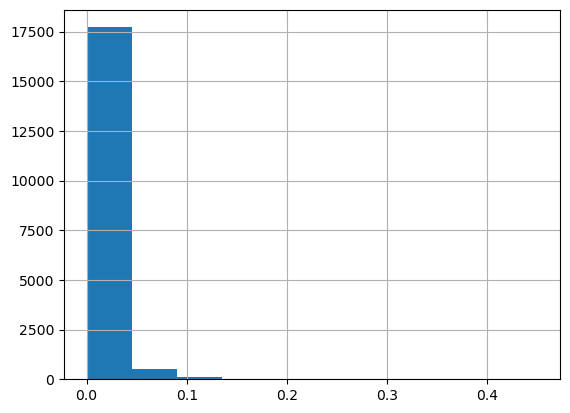

In [ ]:
new_df["Wage(in Euro)"].hist()
plt.show()

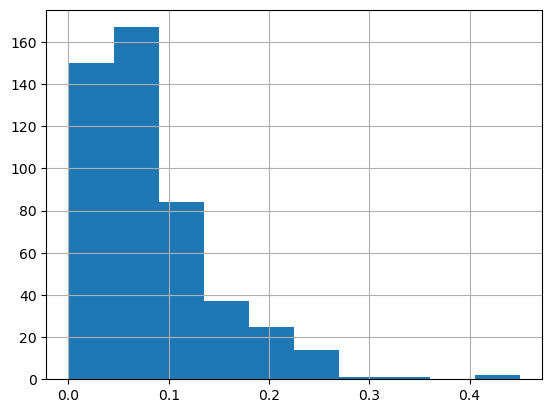

In [ ]:
top_clubs_by_salary["Wage(in Euro)"].hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

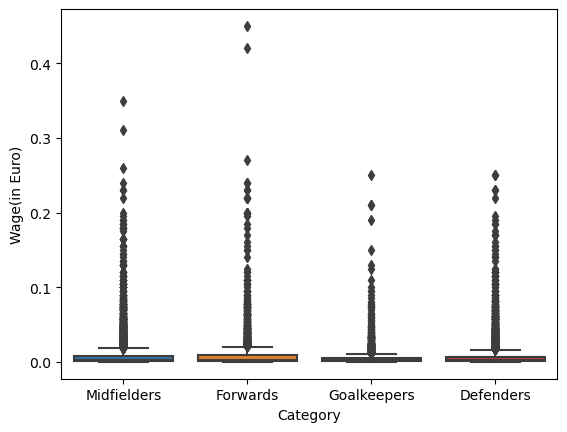

In [ ]:
sns.boxplot(data=new_df , x= "Category" , y = "Wage(in Euro)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

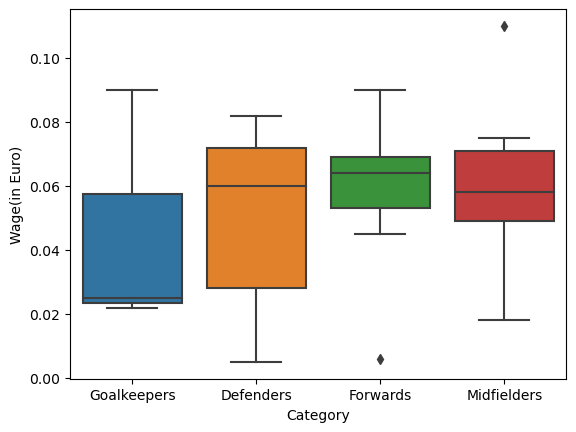

In [ ]:
sns.boxplot(data=ac_milan_df , x= "Category" , y = "Wage(in Euro)")
plt.show 

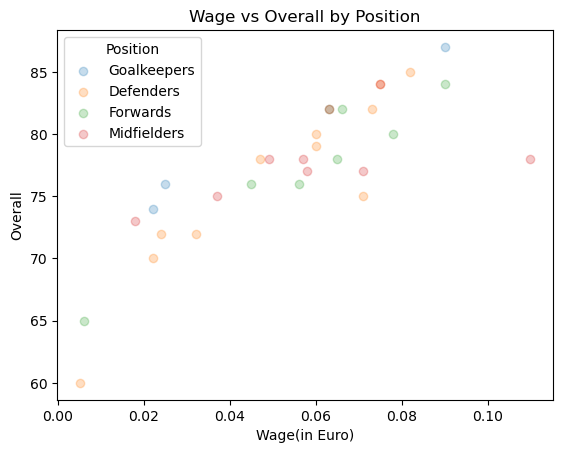

In [ ]:
positions = ac_milan_df['Category'].unique()


for position in positions:
    filtered_data = ac_milan_df[ac_milan_df['Category'] == position]
    plt.scatter(filtered_data['Wage(in Euro)'], filtered_data['Overall'], alpha=0.25, label=position)

plt.xlabel('Wage(in Euro)')
plt.ylabel('Overall')
plt.legend(title='Position')
plt.title('Wage vs Overall by Position')
plt.show()


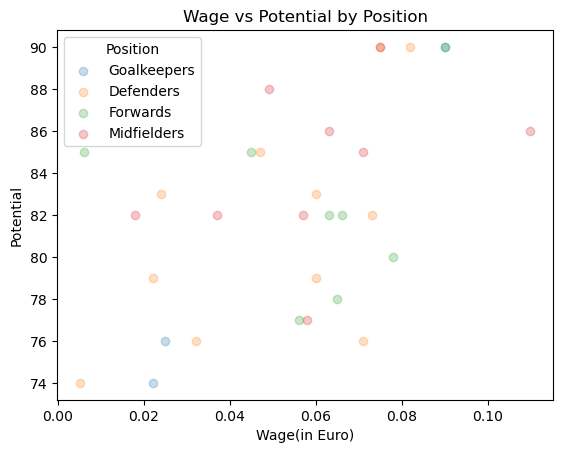

In [ ]:
positions = ac_milan_df['Category'].unique()


for position in positions:
    filtered_data = ac_milan_df[ac_milan_df['Category'] == position]
    plt.scatter(filtered_data['Wage(in Euro)'], filtered_data['Potential'], alpha=0.25, label=position)

plt.xlabel('Wage(in Euro)')
plt.ylabel('Potential')
plt.legend(title='Position')
plt.title('Wage vs Potential by Position')
plt.show()


In [ ]:
ac_milan_df[(ac_milan_df['Wage(in Euro)']>0.100)&(ac_milan_df['Overall']<80)]


Known As  Value(in Euro)  Wage(in Euro)  Release Clause     Category  \
26   Brahim            31.5           0.11             0.0  Midfielders   

    Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
26       78         86   22          78              69             76   

    Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
26               82               30                High              Medium   

   National Team Name Club Name  Wage(in Euro)_median_salary  Overall_median  
26                  -  AC Milan                        0.058            78.0

In [ ]:
ac_milan_df[(ac_milan_df['Wage(in Euro)']>0.06)&(ac_milan_df['Overall']<78)]

Known As  Value(in Euro)  Wage(in Euro)  Release Clause     Category  \
9   T. Bakayoko             6.0          0.071             0.0    Defenders   
27      S. Dest            22.5          0.071             0.0  Midfielders   

    Overall  Potential  Age  Pace Total  Shooting Total  Passing Total  \
9        75         76   27          61              48             65   
27       77         85   21          86              59             74   

    Dribbling Total  Defending Total Attacking Work Rate Defensive Work Rate  \
9                71               75              Medium              Medium   
27               81               69                High                 Low   

   National Team Name Club Name  Wage(in Euro)_median_salary  Overall_median  
9                   -  AC Milan                        0.060            78.0  
27      United States  AC Milan                        0.058            78.0

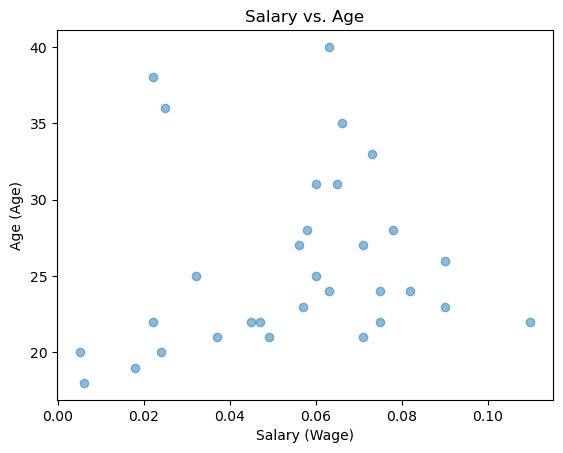

In [ ]:
# plt.scatter(ac_milan_df['Wage(in Euro)'],ac_milan_df['Age'],alpha=0.25)
# plt.show()

plt.scatter(ac_milan_df['Wage(in Euro)'], ac_milan_df['Age'], alpha=0.5)
plt.title('Salary vs. Age')
plt.xlabel('Salary (Wage)')
plt.ylabel('Age (Age)')

# Exibir o gráfico
plt.show()

In [ ]:
salary_by_age_ac_milan = ac_milan_df.groupby('Age')['Wage(in Euro)'].mean().reset_index()
salary_by_age_all = new_df.groupby('Age')['Wage(in Euro)'].mean().reset_index()
salary_by_age_top_clubs = top_clubs_by_salary.groupby('Age')['Wage(in Euro)'].mean().reset_index()

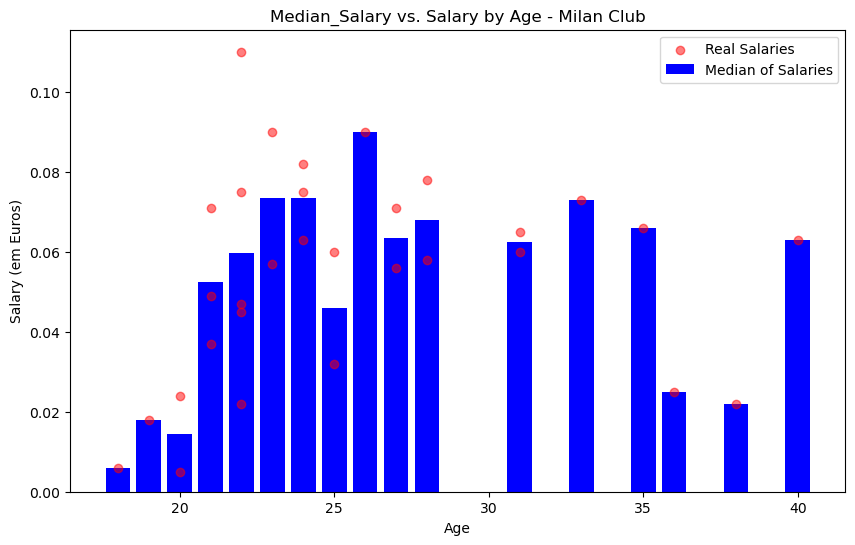

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(salary_by_age_ac_milan['Age'], salary_by_age_ac_milan['Wage(in Euro)'], label='Median of Salaries', color='blue')
plt.scatter(ac_milan_df['Age'], ac_milan_df['Wage(in Euro)'], alpha=0.5, label='Real Salaries', color='red')
plt.title('Median_Salary vs. Salary by Age - Milan Club')
plt.xlabel('Age')
plt.ylabel('Salary (em Euros)')
plt.legend()
plt.show()

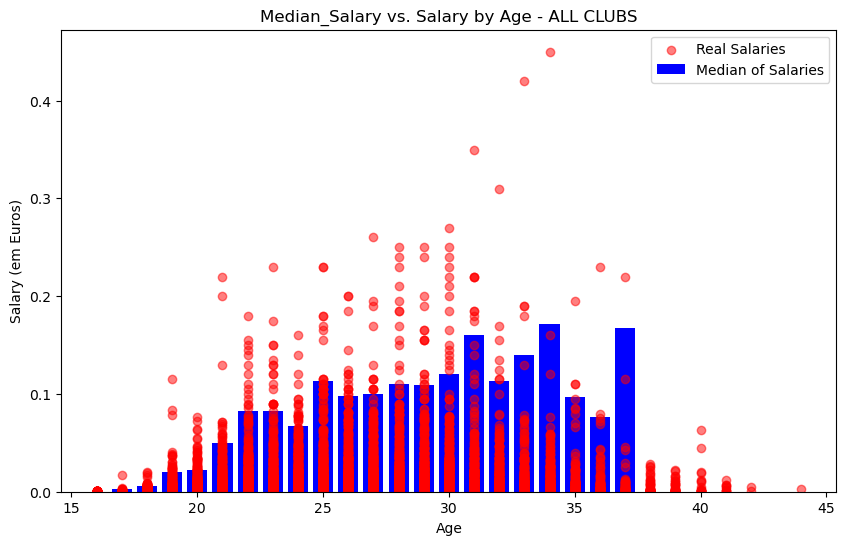

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(salary_by_age_top_clubs['Age'], salary_by_age_top_clubs['Wage(in Euro)'], label='Median of Salaries', color='blue')
plt.scatter(new_df['Age'], new_df['Wage(in Euro)'], alpha=0.5, label='Real Salaries', color='red')
plt.title('Median_Salary vs. Salary by Age - ALL CLUBS')
plt.xlabel('Age')
plt.ylabel('Salary (em Euros)')
plt.legend()
plt.show()

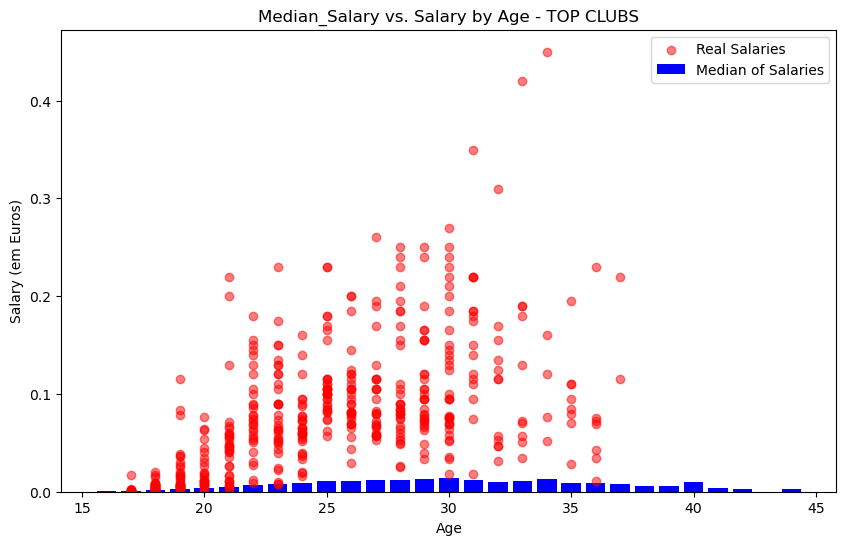

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(salary_by_age_all['Age'], salary_by_age_all['Wage(in Euro)'], label='Median of Salaries', color='blue')
plt.scatter(top_clubs_by_salary['Age'], top_clubs_by_salary['Wage(in Euro)'], alpha=0.5, label='Real Salaries', color='red')
plt.title('Median_Salary vs. Salary by Age - TOP CLUBS')
plt.xlabel('Age')
plt.ylabel('Salary (em Euros)')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

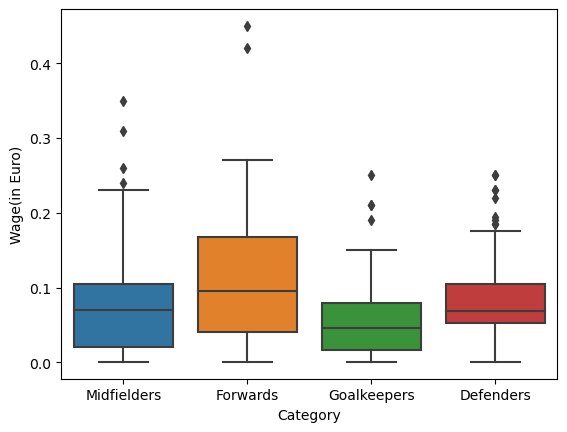

In [ ]:
sns.boxplot(data=top_clubs_by_salary , x= "Category" , y = "Wage(in Euro)")
plt.show 

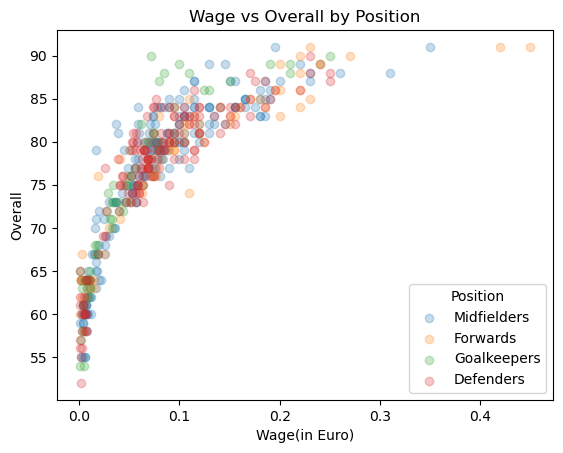

In [ ]:
# plt.scatter(top_clubs_by_salary['Wage(in Euro)'],top_clubs_by_salary['Overall'],alpha=0.25)
# plt.show()

positions = top_clubs_by_salary['Category'].unique()

# Loop para criar um gráfico para cada posição
for position in positions:
    filtered_data = top_clubs_by_salary[top_clubs_by_salary['Category'] == position]
    plt.scatter(filtered_data['Wage(in Euro)'], filtered_data['Overall'], alpha=0.25, label=position)

plt.xlabel('Wage(in Euro)')
plt.ylabel('Overall')
plt.legend(title='Position')
plt.title('Wage vs Overall by Position')
plt.show()

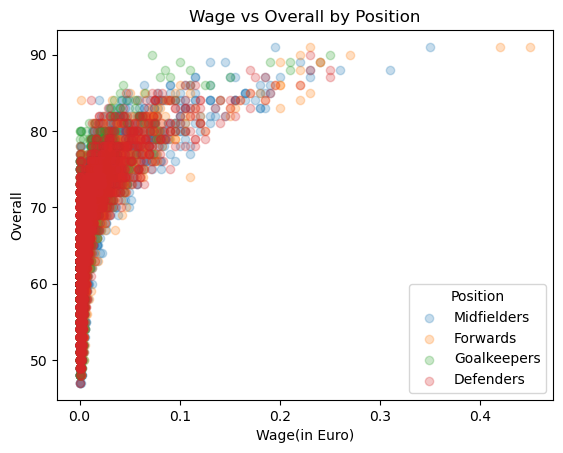

In [ ]:
# plt.scatter(new_df['Wage(in Euro)'],new_df['Overall'],alpha=0.25)
# plt.show()


positions = new_df['Category'].unique()

# Loop para criar um gráfico para cada posição
for position in positions:
    filtered_data = new_df[new_df['Category'] == position]
    plt.scatter(filtered_data['Wage(in Euro)'], filtered_data['Overall'], alpha=0.25, label=position)

plt.xlabel('Wage(in Euro)')
plt.ylabel('Overall')
plt.legend(title='Position')
plt.title('Wage vs Overall by Position')
plt.show()

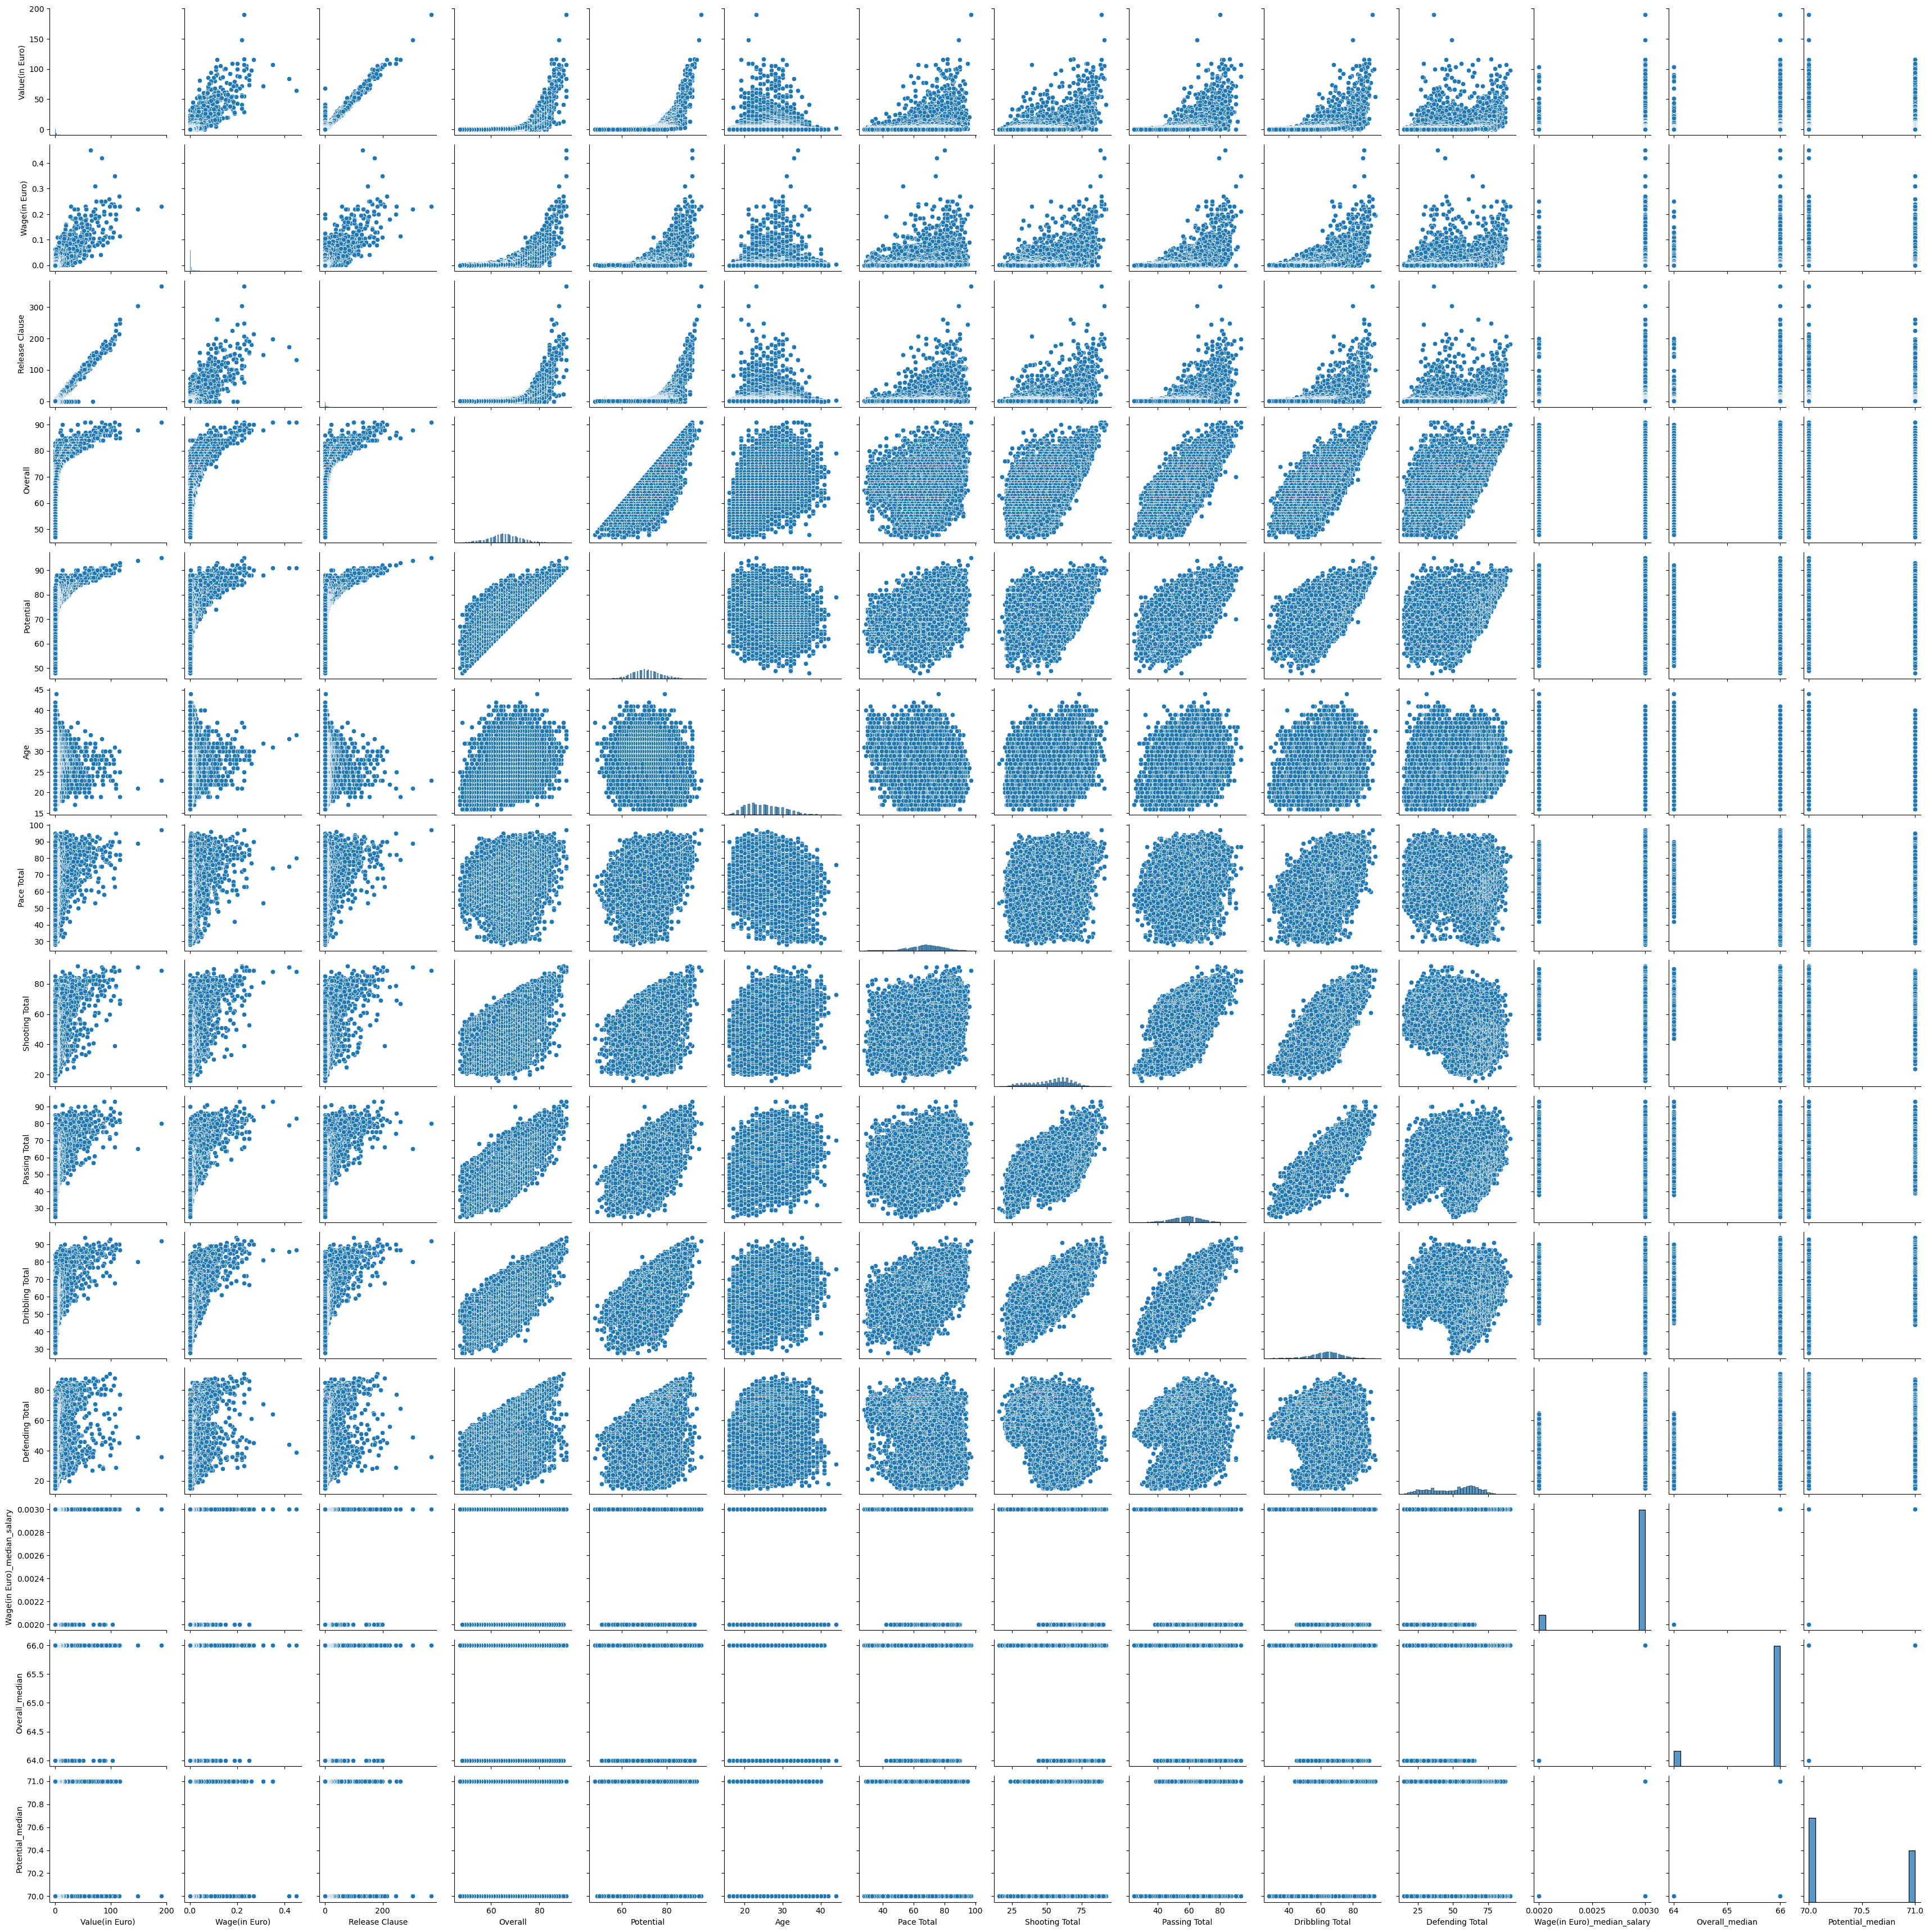

In [ ]:
sns.pairplot(new_df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:

X = new_df[['Category', 'Overall', 'Potential', 'Age', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Attacking Work Rate', 'Defensive Work Rate']]
y = new_df['Wage(in Euro)']

X_encoded = pd.get_dummies(X, columns=['Category', 'Attacking Work Rate', 'Defensive Work Rate'])


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Avalie o modelo nos dados de teste
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.0002732174172388438


In [ ]:
from sklearn.metrics import r2_score

# Calcular o R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.3684824150275562
